In this file, the goal is to compute the number of non zero in the .nii.gz files for each subject

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from glob import glob
from soma import aims

In [8]:
PEPR_left = glob("/neurospin/dico/data/human/PEPR_Marseille/derivatives/deep_folding-2025/skeletons/2mm/L/*.nii.gz")

In [9]:
PEPR_right = glob("/neurospin/dico/data/human/PEPR_Marseille/derivatives/deep_folding-2025/skeletons/2mm/R/*.nii.gz")

In [10]:
len(PEPR_left)

1035

In [12]:
len(PEPR_right)

1035

On met les fichiers correspondant dans le même ordre

In [14]:

def key_without_side(path):
    name = os.path.basename(path)
    return name[1:]  # enlève le R ou le L initial

In [18]:
def sorted_file(L_right, L_left):
    # Dictionnaires clé → fichier
    right_dict = {key_without_side(f): f for f in L_right}
    left_dict = {key_without_side(f): f for f in L_left}

    # Clés communes
    common_keys = sorted(set(right_dict) & set(left_dict))

    # Listes alignées
    L_right_sorted = [right_dict[k] for k in common_keys]
    L_left_sorted  = [left_dict[k] for k in common_keys]

    return L_right_sorted, L_left_sorted

In [16]:
PEPR_right, PEPR_left = sorted_file(PEPR_right, PEPR_left)

In [19]:
value_PEPR_right =[]
value_PEPR_left =[]

In [21]:
for a in PEPR_right:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_PEPR_right.append(r)

In [23]:
for a in PEPR_left:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_PEPR_left.append(r)

Pour UKB et hcp

In [32]:
UKB_left= glob("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/skeletons/2mm/L/*.nii.gz")
UKB_right= glob("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/skeletons/2mm/R/*.nii.gz")

In [33]:
def sorted_UKB_file(L_right, L_left):
    # Dictionnaires clé → fichier
    right_dict = {key_without_side(f): f for f in L_right}
    left_dict = {key_without_side(f): f for f in L_left}

    # Clés communes
    common_keys = sorted(set(right_dict) & set(left_dict))

    # Listes alignées
    L_right_sorted = [right_dict[k] for k in common_keys]
    L_left_sorted  = [left_dict[k] for k in common_keys]

    return L_right_sorted[:1000], L_left_sorted[:1000]

In [34]:
UKB_right, UKB_left = sorted_UKB_file(UKB_right, UKB_left)


In [35]:
value_UKB_right =[]
value_UKB_left =[]

In [36]:
for a in UKB_right:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_UKB_right.append(r)

In [37]:
for a in UKB_left:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_UKB_left.append(r)

In [38]:
hcp_left= glob("/neurospin/dico/data/deep_folding/current/datasets/hcp/skeletons/2mm/L/*.nii.gz")
hcp_right= glob("/neurospin/dico/data/deep_folding/current/datasets/hcp/skeletons/2mm/R/*.nii.gz")

In [39]:
hcp_right, hcp_left = sorted_UKB_file(hcp_right, hcp_left)


In [40]:
value_hcp_right =[]
value_hcp_left =[]

In [41]:
for a in hcp_right:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_hcp_right.append(r)

In [42]:
for a in hcp_left:
    r=aims.read(a)
    r= np.count_nonzero(r.np)
    value_hcp_left.append(r)

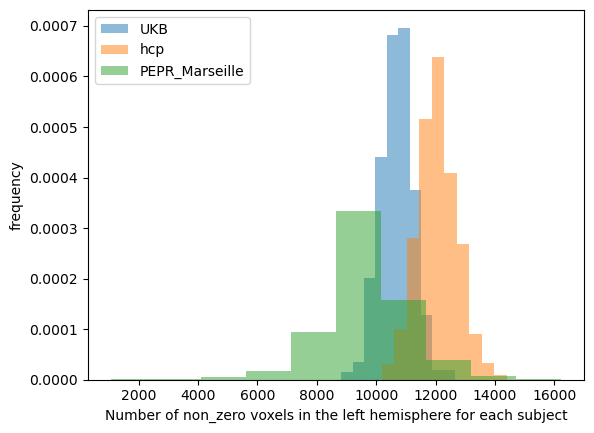

In [47]:
plt.hist(value_UKB_left, label="UKB", alpha=0.5, density=True)
plt.hist(value_hcp_left, label="hcp", alpha=0.5, density=True)
plt.hist(value_PEPR_left, label="PEPR_Marseille", alpha=0.5, density=True)
plt.xlabel("Number of non_zero voxels in the left hemisphere for each subject")
plt.ylabel("frequency")
plt.legend()
plt.show()

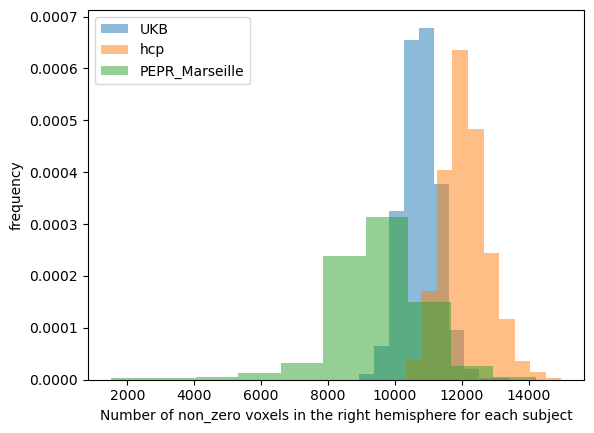

In [48]:
plt.hist(value_UKB_right, label="UKB", alpha=0.5, density=True)
plt.hist(value_hcp_right, label="hcp", alpha=0.5, density=True)
plt.hist(value_PEPR_right, label="PEPR_Marseille", alpha=0.5, density=True)
plt.xlabel("Number of non_zero voxels in the right hemisphere for each subject")
plt.ylabel("frequency")
plt.legend()
plt.show()

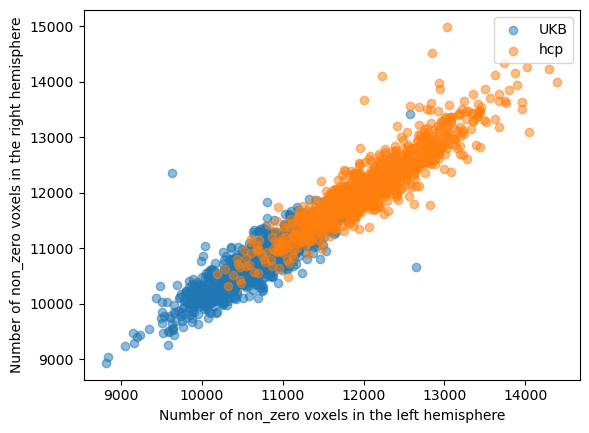

In [51]:
plt.scatter(value_UKB_left, value_UKB_right, alpha=0.5, label="UKB")
plt.scatter(value_hcp_left, value_hcp_right, alpha=0.5, label="hcp")
#plt.scatter(value_PEPR_left, value_PEPR_right, alpha=0.5, label="PEPR_Marseille")
plt.xlabel("Number of non_zero voxels in the left hemisphere")
plt.ylabel("Number of non_zero voxels in the right hemisphere")
plt.legend()
plt.show()